# PyTorch

## __Tensors__

Одно из основных понятий в PyTorch -- это __Tenosor__. 

https://pytorch.org/docs/master/tensors.html

__Tensor__ -- это такой же массив, как и в __numpy.array__, размерность и тип данных которого мы можем задать. Tensor в отличие от numpy.array может вычисляться на __GPU__.

In [191]:
import numpy as np
import torch

In [192]:
N = 100
D_in = 50

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

x = np.random.randn(N, D_in)
x_torch = torch.randn(N, D_in, device=device, dtype=dtype)

In [193]:
x

array([[-1.44234885,  0.02996208, -0.5014054 , ..., -1.30129225,
        -2.77603779, -0.00408162],
       [-1.14307913,  0.35580002,  0.9708183 , ..., -0.20664065,
         0.93505292,  0.63101935],
       [-0.44238371,  1.37727251,  1.00153415, ...,  0.22596191,
        -0.06585651, -1.2376325 ],
       ...,
       [ 0.00508039,  2.38676144, -0.30183315, ..., -1.22765818,
        -0.71755982,  0.18899253],
       [ 1.27644443, -0.4041108 ,  0.29626178, ..., -0.91775934,
        -0.51741714,  0.46747758],
       [ 1.56362954,  1.83066858, -1.60214323, ..., -1.75677981,
        -0.79716393,  0.38252436]])

In [194]:
x_torch

tensor([[-1.2012, -1.2991, -0.1565,  ...,  1.8392,  0.0575, -1.7415],
        [-0.3982,  0.5786, -1.5004,  ...,  0.0332, -1.3413,  0.2392],
        [ 0.0768,  0.2499, -1.3324,  ...,  0.5359,  0.2112, -1.1233],
        ...,
        [-0.6314, -0.7497, -2.0368,  ...,  0.3265, -1.1243,  0.3606],
        [ 1.0406,  1.2340, -1.1667,  ..., -1.8202,  1.2522, -0.3802],
        [-0.3726,  0.4296,  0.8951,  ...,  1.3295, -0.0214,  0.9358]])

In [195]:
x_torch = torch.Tensor(np.ones((N, D_in)))
x_torch

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

In [196]:
x_torch = torch.FloatTensor([1, 2, 3])
x_torch

tensor([1., 2., 3.])

In [197]:
x1 = torch.IntTensor([1, 2, 3])
x2 = torch.FloatTensor([3, 4, 5])

В PyTorch можно найти много операций, которые похожи на то, что есть в numpy :
```
- torch.add (np.add) -> сложение тензоров (поэлементное)
- torch.sub (np.subtract) -> вычитание (поэлементное)
- torch.mul (np.multiply) -> умнажение скаляров / матриц (поэлементное)
- torch.mm (np.matmul) -> перемножение матриц
- torch.ones (np.ones) -> создание тензора из единиц
```

In [198]:
# Давайте попробуем вышепересчисленные операции

In [199]:
x1 = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])

In [200]:
x2 = torch.FloatTensor([[7, 8], [9, 1], [2, 3]])

In [201]:
out = torch.mm(x1, x2)
out

tensor([[31., 19.],
        [85., 55.]])

```
- torch.reshape (np.reshape) -> изменения порядка элементов в тензоре, не путать с транспонированием.
```

## Dynamic Computational Graph

После того, как были реализованы архитектура модели и весь процес обучения и валидация сети, при запуске кода в PyTorch происходят следующие этапы:

1. Строится вычислительный граф (направленный ациклический граф), где каждый узел -- это тензор, а ребро, ведущее к дргуому узлу, это выполнение операции над данным тензором, которое ведет к результату - другому тензору.

<img src="https://beebom.com/wp-content/uploads/2016/07/Tensor-bb-tensor-flowing.jpg" alt="Drawing" style="height: 100px;"/>

Реализуем двухслойную сеть для задачи регрессии. И граф для такой архитектуры бдует выглядить следующим образом:

<img src="https://github.com/RiskModellingResearch/RiskManagementDL_Autumn21/blob/main/week03/images/RegGraph.png?raw=1" alt="Drawing" />

In [256]:
batch_size = 64
input_size = 1
hidden_size = 10
output_size = 1

In [304]:
x = np.arange(-10, 10, 0.01).reshape(-1, 1)
y = x**2 * np.sin(x).reshape(-1, 1)
batch_size = 2000

In [305]:
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

In [258]:
# Create random input and output data
x = torch.randn(batch_size, input_size, device=device, dtype=dtype)
y = torch.randn(batch_size, output_size, device=device, dtype=dtype)

In [306]:
# Randomly initialize weights
w0 = torch.randn(1, batch_size, device=device, dtype=dtype)
w1 = torch.randn(input_size, hidden_size, device=device, dtype=dtype)
w2 = torch.randn(hidden_size, output_size, device=device, dtype=dtype)

In [307]:
learning_rate = 1e-6
relu = torch.nn.ReLU()
for t in range(500):
    # Forward pass: compute predicted y
    #TODO
    y_pred = torch.mm(relu(torch.add(w0.T, torch.mm(x,w1))), w2)
    #y_pred = torch.mm(relu(torch.mm(x,w1)), w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).mean().item()

In [308]:
loss

683.5848388671875

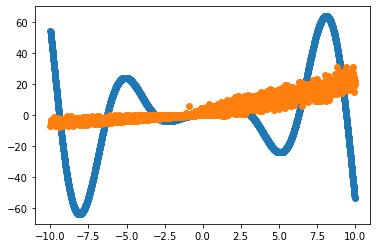

In [309]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.scatter(x, y_pred)

## Autograd

2. Еще одно фундаментальное понятие и важный элемент при построении графа -- это __Autograd__ -- автоматическое дифференцирование.

Для того чтобы с помощью стохастического градиентного спуска обновить обучаемые параметры сети, нужно посчитать градиенты. И как известно, обновление весов, которые учавтсвуют в нескольких операциях, происходит по `правилу дифференцирования сложной функции` (цепное правило или __chain rule__).

<img src="https://github.com/RiskModellingResearch/RiskManagementDL_Autumn21/blob/main/week03/images/RegChainRule.png?raw=1" alt="Drawing" />

То есть (1) вычислительный граф позволяет определить последовательность операций, а (2) автоматическое дифференцирование посчитать нужные градиенты.

Если бы `Autograd` не было, то тогда backprop надо было бы реализовывать самим, и как это бы выглядело?

Рассмотрим на примере, как посчиать градиенты для весов из входного слоя, где входной вектора `X` состоит из 3-х компонент. А входной слой вторую размерность имеет равной 2. 

После чего это идет в `ReLU`, но для простоты опустим на время ее, и посмотрим как дальше это идет по сети.

Ниже написано, как это все вычисляется и приводит нас к значению целевой функции для одного наблюдения

<img src="https://github.com/RiskModellingResearch/RiskManagementDL_Autumn21/blob/main/week03/images/1.png?raw=1" alt="1" style="width: 600px;"/>

Тогда, чтобы посчитать градиент по первому элементу из обучаемой матрицы на первом слое, необходимо взять производоную у сложной функции. А этот как раз делается по `chain rule`: сначала берем у внешней, потом спускаемся на уровень ниже, и так пока не додйдем до то функции, после которой эта перменная уже нигде не участвует:

<img src="https://github.com/RiskModellingResearch/RiskManagementDL_Autumn21/blob/main/week03/images/2.png?raw=1" alt="2" style="width: 400px;"/>

Перепишем это все в матричном виде, то есть сделаем аналог вида матрицы весов из первого слоя, но там уже будут её градиенты, котоыре будут нужны чтобы как раз обновить эти веса:

<img src="https://github.com/RiskModellingResearch/RiskManagementDL_Autumn21/blob/main/week03/images/3.jpg?raw=1" alt="3" style="width: 600px;"/>

Как видно, здесь можно вектор X вынести, то есть разделить на две матрицы:

<img src="https://github.com/RiskModellingResearch/RiskManagementDL_Autumn21/blob/main/week03/images/4.jpg?raw=1" alt="4" style="width: 500px;"/>

То есть уже видно, что будем траспонировать входной вектор(матрицу). Но надо понимать, что в реальности у нас не одно наблюдение в батче, а несколько, тогда запись немного изменит свой вид:

<img src="https://github.com/RiskModellingResearch/RiskManagementDL_Autumn21/blob/main/week03/images/5.jpg?raw=1" alt="5" style="width: 500px;"/>

Теперь мы видим, как на самом деле вычисляется вот те самые частные производные для вектора X, то есть видно, как математически это можно записать, а именно:

<img src="https://github.com/RiskModellingResearch/RiskManagementDL_Autumn21/blob/main/week03/images/6.jpg?raw=1" alt="6" style="width: 500px;"/>

<img src="https://github.com/RiskModellingResearch/RiskManagementDL_Autumn21/blob/main/week03/images/7.jpg?raw=1" alt="7" style="width: 500px;"/>

Уже можно реализовать. Понятно, что транспонируется, что нет, и что на что умножается.

Но помним про ReLU. Для простоты опустили, но теперь её учесть будет легче. 

Так как после первого слоя идет ReLU, а значит, занулились те выходы первого слоя, которые были __меньше__ нуля. Получается, что во второй слой не все дошло, тогда нужно обнулить, что занулил ReLU. 

Что занулил ReLU, мы можем выяснить при `forward pass`, а где именно поставить нули, то надо уже смотреть относительно `backward propagation`, на том выходе, где последний раз участвовал выход после ReLU, то есть:

<img src="https://github.com/RiskModellingResearch/RiskManagementDL_Autumn21/blob/main/week03/images/8.jpg?raw=1" alt="8" style="width: 600px;"/>

Теперь реализуем эти формулы на PyTorch:

In [364]:
w0 = torch.randn(1, batch_size, device=device, dtype=dtype)
w1 = torch.randn(input_size, hidden_size, device=device, dtype=dtype)
w2 = torch.randn(hidden_size, output_size, device=device, dtype=dtype)

In [365]:
# WITH BIAS
learning_rate = 1e-6
for t in range(200000):
    h1 = w0.T.add(x.mm(w1))
    h_relu = torch.relu(h1)
    y_pred = h_relu.mm(w2)

    loss = (y_pred - y).pow(2).sum()
    if t % 10000 == 0:
      print(t, loss.item())
    
    # Теперь подсчет градиентов для весов происходит при вызове backward
    
    dypred_dw2 = torch.mm(x,w1)
    dypred_dw2[h_relu == 0] = 0
    grad_w2 = torch.mm(dypred_dw2.T, (2*(y_pred - y)))
    
    dypred_dw1 = torch.mm((2*(y_pred - y)), w2.T)
    dypred_dw1[h_relu == 0] = 0
    grad_w1 = torch.mm(x.T, dypred_dw1)
    
    dypred_dw0 = torch.mm((2*(y_pred - y)), w2.T)
    dypred_dw0[h_relu == 0] = 0
    grad_w0 = torch.mm(torch.ones(1, hidden_size), dypred_dw0.T)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    w0 -= learning_rate * grad_w0

0 2592298.75
10000 966593.0625
20000 857978.875
30000 741517.0
40000 627332.625
50000 527360.625
60000 441048.40625
70000 380609.1875
80000 458628.46875
90000 328930.3125
100000 195795.25
110000 239188.84375
120000 571204.1875
130000 614434.0625
140000 298618.125
150000 308657.5625
160000 533074.125
170000 315111.5625
180000 314551.09375
190000 292917.0


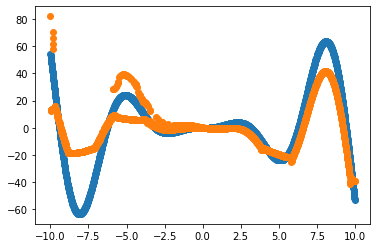

In [367]:
plt.scatter(x, y)
plt.scatter(x, y_pred.detach().numpy())

In [375]:
w1 = torch.randn(input_size, hidden_size, device=device, dtype=dtype)
w2 = torch.randn(hidden_size, output_size, device=device, dtype=dtype)

In [376]:
# WITHOUT BIAS
learning_rate = 1e-6
for t in range(50000):
    h1 = x.mm(w1)

    h_relu = torch.relu(h1)
    y_pred = h_relu.mm(w2)

    loss = (y_pred - y).pow(2).sum()
    if t % 10000 == 0:
      print(t, loss.item())
    
    # Теперь подсчет градиентов для весов происходит при вызове backward
    
    dl_dypred = torch.mm((2*(y_pred - y)), w2.T)

    grad_w2 = torch.mm(relu(torch.mm(x,w1)).T, (2*(y_pred - y)))
    dl_dypred = torch.mm((2*(y_pred - y)), w2.T)
    dl_dypred[h_relu == 0] = 0
    grad_w1 = torch.mm(x.T, dl_dypred)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 1543076.75
10000 1279750.25
20000 1279750.25
30000 1279750.25
40000 1279750.25


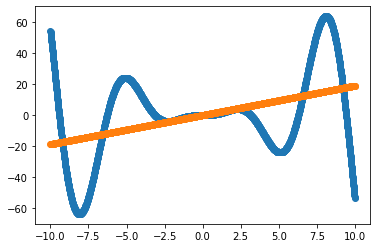

In [377]:
plt.scatter(x, y)
plt.scatter(x, y_pred)

Благодаря `Autograd` реализацию `chain rule` можно избежать, так как для более сложных нейронных сетей вручную такое реализовать сложно, при этом сделать это эффективным.

Для того чтобы PyTorch понял, за какими переменными надо "следить", то есть указать, что именно "эти" переменные являются обучаемыми, необходимо при создании тензора в качестве аттрибута указать __requires_grad=True__:

In [378]:
w0 = torch.randn(1, batch_size, device=device, dtype=dtype, requires_grad=True)
w1 = torch.randn(input_size, hidden_size, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(hidden_size, output_size, device=device, dtype=dtype, requires_grad=True)

In [369]:
learning_rate = 1e-6
for t in range(200000):
    h1 = w0.T.add(x.mm(w1))
    h_relu = torch.relu(h1)
    y_pred = h_relu.mm(w2)

    loss = (y_pred - y).pow(2).sum()
    if t % 10000 == 0:
      print(t, loss.item())
    
    # Теперь подсчет градиентов для весов происходит при вызове backward
    loss.backward()
   
    # Обновляем значение весов, но укзаываем, чтобы PyTorch не считал эту операцию, 
    # которая бы учавствовала бы при подсчете градиентов в chain rule
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w0 -= learning_rate * w0.grad
        
        # Теперь обнуляем значение градиентов, чтобы на следующем шаге 
        # они не учитывались при подсчете новых градиентов,
        # иначе произойдет суммирвоание старых и новых градиентов
        w1.grad.zero_()
        w2.grad.zero_()
        w0.grad.zero_()

0 1634507.25
10000 674062.75
20000 3181695.0
30000 411230.59375
40000 392144.53125
50000 173478.46875
60000 152602.578125
70000 153538.640625
80000 192484.96875
90000 246711.296875
100000 251423.96875
110000 233610.71875
120000 269995.75
130000 262694.09375
140000 300853.125
150000 316245.25
160000 247599.9375
170000 251083.890625
180000 250551.484375
190000 283628.75


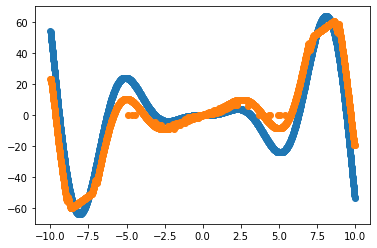

In [370]:
plt.scatter(x, y)
plt.scatter(x, y_pred.detach().numpy())

Осталось еще не вручную обновлять веса, а использовать адаптивные методы градинетного спсука. Для этого нужно использовать модуль __optim__. А помимо оптимайзера, еще можно использовать готовые целевые функции из модлуя __nn__.

In [395]:
w0 = torch.randn(1, batch_size, device=device, dtype=dtype, requires_grad=True)
w1 = torch.randn(input_size, hidden_size, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(hidden_size, output_size, device=device, dtype=dtype, requires_grad=True)

In [396]:
import torch.optim as optim

loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-2
optimizer = torch.optim.Adam([w0, w1, w2], lr=learning_rate)

for t in range(100000):
    optimizer.zero_grad()
    
    h1 = w0.T.add(x.mm(w1))
    #h1 = x.mm(w1)

    h_relu = torch.relu(h1)
    y_pred = h_relu.mm(w2)
    
    loss = loss_fn(y_pred, y)
    if t % 10000 == 0:
        print(t, loss.item())
    
    loss.backward()
   
    optimizer.step()

0 711.8270874023438
10000 552.2141723632812
20000 552.214111328125
30000 552.2145385742188
40000 552.2142333984375
50000 552.2163696289062
60000 552.2139282226562
70000 54.41628646850586
80000 53.90192794799805
90000 53.901939392089844


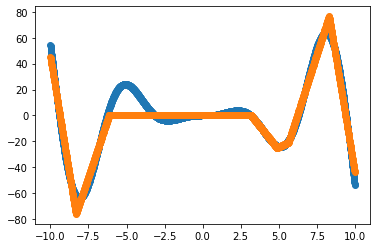

In [397]:
plt.scatter(x, y)
plt.scatter(x, y_pred.detach().numpy())

После того, как мы сделали backward, в этот момент посчитались градиенты и граф уничтожился, то есть стёрлись все пути, которые связывали тензоры между собой. Это значит, что еще раз backward сделать не поулчится, будет ошибка. Но если вдруг нужно считать градиенты еще раз, то нужно при вызове backward задать `retain_graph=True`.

Еще важный аттрибут, который есть у Tensor -- это `grad_fn`. В этом аттрибуте указывается та функция, посредством которой был создан этот тензор. Так PyTorch понимает, как именно считать по нему градиент.

In [276]:
y_pred.grad_fn

Также можно контролировать, должны ли градиенты течь или нет.

In [ ]:
x = torch.tensor([1], requires_grad=True)
with torch.no_grad():
    with torch.enable_grad():
        y = x * 2
y.requires_grad

## Почему Backprop надо понимать

1. Backprop позволяет понимать, как те или иные операции, сложные конструкции в сети влияют на обнолвение весов.
Почему лучше сделать конкатенацию тензоров, а не поэлементное сложение. Для этого нужно посмотреть на backprop, как будут обновляться веса.

2. Даже на таком маленьком пример двуслойной MLP можно уже увидеть, когда `ReLU`, как функция активация, не очень хорошо применять. Если разреженные данные, то получить на выходе много нулей вероятнее, чем при использовании `LeakyReLU`, то есть градиенты будут нулевыми и веса никак не будут обновляться => сеть не обучается!

3. В архитектуре могут встречаться недифференцируемые операции, и первое - это нужно понять, потому что при обучении сети это может быть не сразу заметно, просто качество модели будет плохое, и точность хорошую не поулчится достичь.

Например, в одной из статей было предложено в качестве механизма внимания применить распределение Бернулли, которое умножается на выход промежуточного слоя сети. И эта опреация недифференцируема, нужно реализовывать backprop самим, тем самым обеспечить корректное протекание градиентов.


<img src="https://github.com/RiskModellingResearch/RiskManagementDL_Autumn21/blob/main/week03/images/Bernoulli.png?raw=1" alt="8" style="width: 600px;"/>

Так же любая статья, которая предлагет новую целевую функцию для той или иной задачи, там всегда будут представлены градиенты, чтобы было понимание, как это влияет на обновление весов. Не просто так !

<img src="https://github.com/RiskModellingResearch/RiskManagementDL_Autumn21/blob/main/week03/images/BernoulliBackProp.png?raw=1" alt="8" style="width: 600px;"/>

## nn.Module

В предыдущем примере архитектуру сети создавали используя последовательной способ объявления слоев сети -- `nn.Sequential`.

Но еще можно это сделать более гибким подходом:

In [401]:
from torch import nn
class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
        TwoLayerNet наследуется от nn.Module и тем самым полчаем возможность
        переопределять методы класса.
        В конструктуре создаем слои (обучаемые веса) и другие нужные перменные/функции,
        которые нужны для модели
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(input_size, hidden_size, bias=True)
        self.linear2 = torch.nn.Linear(hidden_size, output_size, bias=True)

    def forward(self, x):
        """
        Метод forward отвечает за прямое распростронение модели, 
        поэтому данный метод нужно переопределять обязательно, 
        чтобы задать логику прямого распростронения. 
        Именно в этот момент начинает строится динамический граф
        """
        h_relu = torch.relu(self.linear1(x))
        y_pred = self.linear2(h_relu)
        
        return y_pred

In [402]:
batch_size = 64
input_size = 1
hidden_size = 10
output_size = 1

# x = torch.randn(batch_size, input_size, device=device, dtype=dtype)
# y = torch.randn(batch_size, output_size, device=device, dtype=dtype)

model = TwoLayerNet(input_size, hidden_size, output_size)

loss_fn = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

for t in range(100000):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    if t % 1000 == 0:
        print(t, loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 767.235595703125
1000 640.7109985351562
2000 638.4122314453125
3000 635.95654296875
4000 633.0823364257812
5000 629.4408569335938
6000 624.8885498046875
7000 619.527587890625
8000 613.3716430664062
9000 606.3350830078125
10000 598.0118408203125
11000 589.6339721679688
12000 581.2540283203125
13000 574.2135620117188
14000 568.3668212890625
15000 562.5826416015625
16000 558.6602783203125
17000 556.2744750976562
18000 554.6126098632812
19000 553.3350830078125
20000 552.2630615234375
21000 551.3146362304688
22000 550.4555053710938
23000 549.666259765625
24000 548.9262084960938
25000 548.2086181640625
26000 547.4854125976562
27000 546.7265625
28000 545.9070434570312
29000 545.0010375976562
30000 543.9857788085938
31000 542.8389892578125
32000 541.5392456054688
33000 540.0645141601562
34000 538.3917236328125
35000 536.4981079101562
36000 534.3604125976562
37000 531.9539794921875
38000 529.25439453125
39000 526.2392578125
40000 522.8861694335938
41000 519.17529296875
42000 515.0901489257812

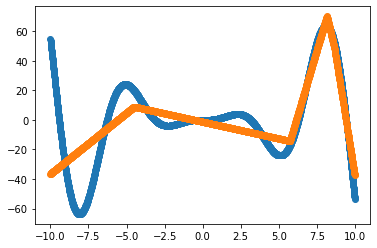

In [403]:
plt.scatter(x, y)
plt.scatter(x, y_pred.detach().numpy())